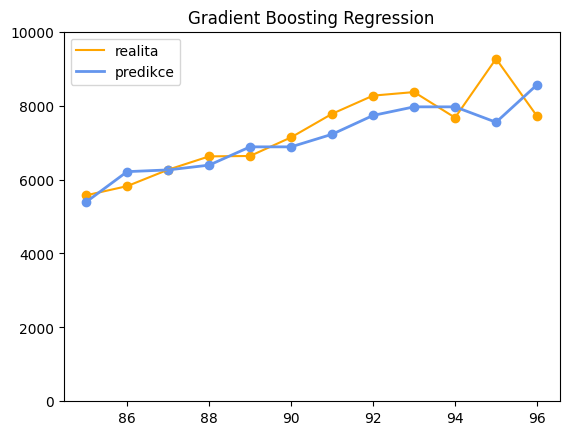

R2: 0.8009228014660168
Root Mean Squared Error: 638.1439659718867
CPU times: total: 875 ms
Wall time: 4.3 s


In [1]:
%%time 
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-12:])

df_train =df.drop(df.index[-12:])
df_test = df.drop(df.index[:-12])
df_test_graf = df_test

#@ parametry
parametry = ['aktivni-1']

#>> dataframy
X = df[parametry]
y = df['aktivni']
X_train = df_train[parametry]
y_train =  df_train["aktivni"]
X_test = df_test[parametry]
y_test = df_test['aktivni']
#>> trenink
#?? dalsi args v dokumentaci: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.gbr.html
gbr = GradientBoostingRegressor(n_estimators=13)
gbr.fit(X_train, y_train)

#>> evaluace
y_pred = gbr.predict(X_test)

#>> dotrenovani modelu na vsech datech
gbr.fit(X,y)

#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.scatter(X_test.index, y_pred, color="cornflowerblue")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=f"predikce", linewidth=2)
plt.title("Gradient Boosting Regression")
plt.ylim(0,10000)
plt.legend()
plt.show()

#>>metriky.
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = np.sqrt(metrics.r2_score(y_test, y_pred))
print("R2:", r2)
print("Root Mean Squared Error:", rmse)

,aktivni-1
97,7714.0



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


,aktivni-1
0,7798.326441



    Model:      GradientBoostingRegressor(n_estimators=13)
    Min:        7160
    Predikce:   7798
    Max:        8436
    Rmse:       638
    


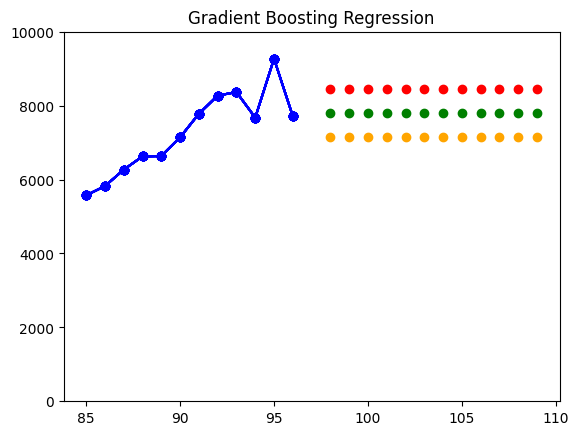

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set.xlsx")
df_orig = df.drop(df.index[-12:])

#df = (df-df.min())/(df.max()-df.min())
df_new = df.drop(df.index[:-12])
df_new = df_new.drop(df_new.index[-11:])
df_train = df.drop(df.index[-12:])

x_new = df_new[parametry]
x_new_graf = x_new
plt.figure()
plt.title("Gradient Boosting Regression")
for i in range(12):
    #>> predikce
    display(x_new)
    y_new_pred = gbr.predict(x_new)
    #>> update dataframe
    x_new = pd.DataFrame(y_new_pred)
    x_new.columns = ["aktivni-1"]
    #>> graf
    #* realita
    plt.plot(X_test.index, df_test['aktivni'],label="aktivni",color="blue")
    plt.scatter(X_test.index, df_test['aktivni'],color="blue")
    #* predikce
    plt.scatter(x_new_graf.index[:]+1+i, y_new_pred, label='predikce', color="green")
    plt.scatter(x_new_graf.index[:]+1+i, y_new_pred - rmse, label="min", color="orange")
    plt.scatter(x_new_graf.index[:]+1+i, y_new_pred + rmse, label="max", color="red")
    plt.ylim(0,10000)

    #>> print
    print(f"""
    Model:      {gbr}
    Min:        {int(y_new_pred-rmse)}
    Predikce:   {int(y_new_pred)}
    Max:        {int(y_new_pred+rmse)}
    Rmse:       {int(rmse)}
    """)